In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import unicodedata
import geopandas as gpd
import get_data
import mapclassify
import contextily as ctx
import numpy as np

In [6]:
import matplotlib.font_manager as fm
# Font Imports
heading_font = fm.FontProperties(fname='/home/ats4i/playfair-display/PlayfairDisplay-Regular.ttf', size=24)
subtitle_font = fm.FontProperties(fname='/home/ats4i/Roboto/Roboto-Regular.ttf', size=16)

In [7]:
get_data.get_data()

Baixando arquivos brasil.io...


In [8]:
df = pd.read_csv("data/dados_total_estados.csv")
df = df[df.state != "Indefinido"]
df.index=df['index']
df = df.drop('index', 1)
df



,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,popEst,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
index,,,,,,,,,,,,
0,2020-06-17,AM,TOTAL,state,59547,2579,93,True,4144597.0,13.0,1436.73800,0.0433
1,2020-06-16,AM,TOTAL,state,58018,2550,92,False,4144597.0,13.0,1399.84660,0.0440
2,2020-06-15,AM,TOTAL,state,56777,2512,91,False,4144597.0,13.0,1369.90400,0.0442
3,2020-06-14,AM,TOTAL,state,56506,2492,90,False,4144597.0,13.0,1363.36536,0.0441
4,2020-06-13,AM,TOTAL,state,56026,2465,89,False,4144597.0,13.0,1351.78402,0.0440
...,...,...,...,...,...,...,...,...,...,...,...,...
190894,2020-02-29,SP,TOTAL,state,2,0,5,False,45919049.0,35.0,0.00436,0.0000
190895,2020-02-28,SP,TOTAL,state,2,0,4,False,45919049.0,35.0,0.00436,0.0000
190896,2020-02-27,SP,TOTAL,state,1,0,3,False,45919049.0,35.0,0.00218,0.0000


In [9]:
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

# States

In [10]:
# Set filepath
fp = "br_unidades_da_federacao/BRUFE250GC_SIR.shp"

# Read file using gpd.read_file()
dataSaude = gpd.read_file(fp)
dataSaude

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
6,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
7,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
8,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


In [11]:
dataSaude = dataSaude.to_crs(epsg=3857)

In [12]:
states=dataSaude.NM_ESTADO.values
display(states)

for i in range(0,len(dataSaude.index)):
    dataSaude.iloc[i,0] = strip_accents(dataSaude.iloc[i,0])
    
display(dataSaude.head(17))

array(['ACRE', 'ALAGOAS', 'AMAPÁ', 'BAHIA', 'CEARÁ', 'DISTRITO FEDERAL',
       'ESPÍRITO SANTO', 'GOIÁS', 'MARANHÃO', 'MATO GROSSO',
       'MATO GROSSO DO SUL', 'MINAS GERAIS', 'PARÁ', 'PARAÍBA',
       'PERNAMBUCO', 'PIAUÍ', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE',
       'RIO GRANDE DO SUL', 'RORAIMA', 'SANTA CATARINA', 'SÃO PAULO',
       'SERGIPE', 'TOCANTINS', 'PARANÁ', 'RONDÔNIA', 'AMAZONAS'],
      dtype=object)

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1..."
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43..."
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355...."
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44..."
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603...."
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-6449226.491 -854896.346, -6448787.0..."


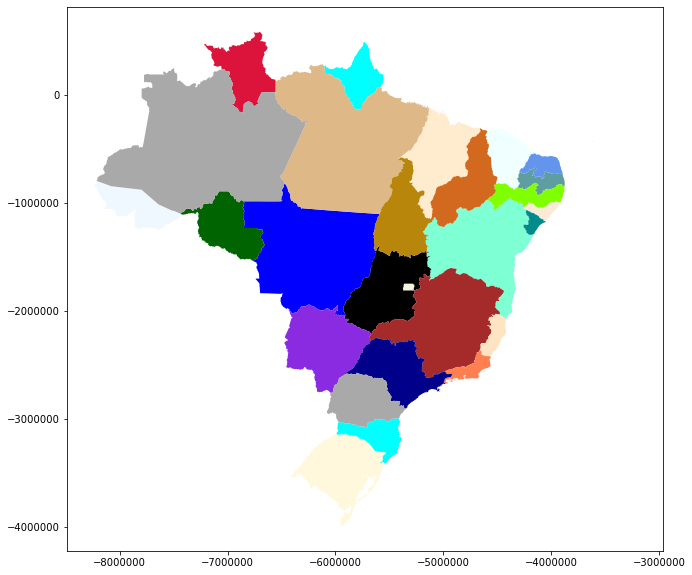

In [13]:
cycol=iter(list(mcolors.CSS4_COLORS.values()))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(0,len(states)):
    plotZ=dataSaude[dataSaude.index==i].plot(ax=ax,color=next(cycol),legend=True)


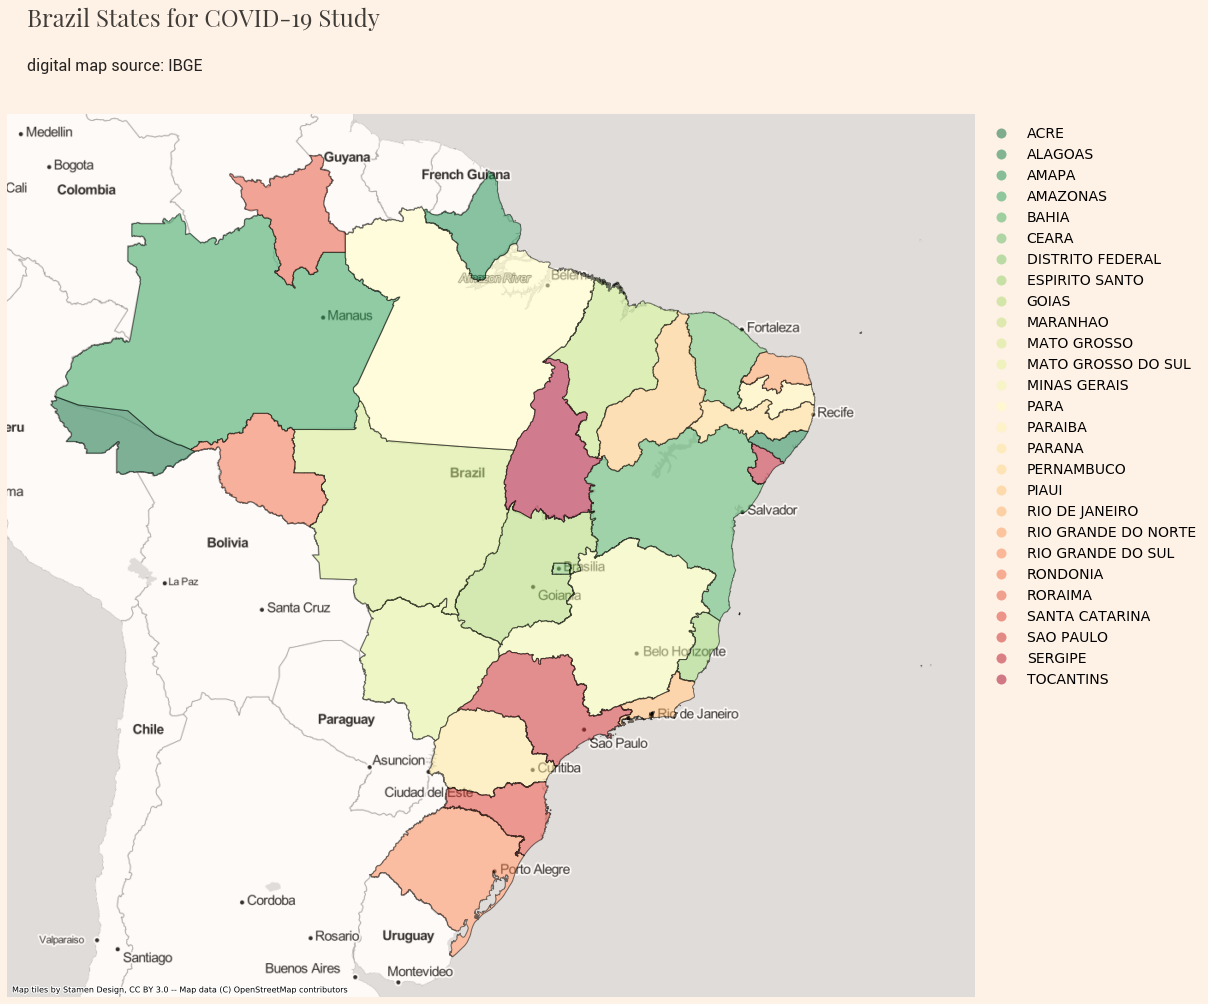

In [39]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.4, 10*1.4),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='NM_ESTADO',alpha=0.5,ax=ax,legend=True,cmap='RdYlGn_r', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=False, loc='upper left',bbox_to_anchor=(1, 1)))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Brazil States for COVID-19 Study",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)

plt.text(x = 0.02, y = 1.05,
            s = "digital map source: IBGE",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [15]:
states=['AC', 'AL', 'AP', 'BA', 'CE', 'DF',
       'ES', 'GO', 'MA', 'MT',
       'MS', 'MG', 'PA', 'PB',
       'PE', 'PI', 'RJ', 'RN',
       'RS', 'RR', 'SC', 'SP',
       'SE', 'TO', 'PR', 'RO', 'AM']
dataSaude['states']=pd.Series(states,index=dataSaude.index)
display(dataSaude)

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,states
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0...",AC
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1...",AL
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585...",AP
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43...",BA
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7...",CE
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355....",DF
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44...",ES
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603....",GO
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489...",MA
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-6449226.491 -854896.346, -6448787.0...",MT


In [16]:
def load_confirmed(start_date, state):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/confirmados.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[state].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

def load_dead(start_date, state):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/mortes.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[state].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

In [17]:
def last_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    val = arr.shape[axis] - np.flip(mask, axis=axis).argmax(axis=axis) - 1
    return np.where(mask.any(axis=axis), val, invalid_val)

start_date="2020-03-15"
states=sorted(states)
dataSaude=dataSaude.sort_values('states') 

infected=[]
dead=[]
dateX=[]
for state in states:
    deadX=load_dead(start_date, state).values
    date=load_dead(start_date, state).index.values
    lastDead=last_nonzero(deadX,0)[0]
    infectedX=load_confirmed(start_date, state).values
    lastInfected=last_nonzero(infectedX,0)[0]
    lastRecord=min(lastInfected,lastDead)
    infected.append(infectedX[lastRecord][0])
    dead.append(deadX[lastRecord][0])
    dateX=np.append(dateX,date[lastRecord])
    
dataSaude=dataSaude.sort_values('states')  
dataSaude['infected']=pd.Series(infected,index=dataSaude.index)
dataSaude['dead']=pd.Series(dead,index=dataSaude.index)
dataSaude['date']=pd.Series(dateX,index=dataSaude.index)

In [18]:
display(dataSaude)

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,states,infected,dead,date
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0...",AC,10339.0,281.0,2020-06-17
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1...",AL,24867.0,811.0,2020-06-17
26,AMAZONAS,NORTE,13,"POLYGON ((-7494705.886 225993.992, -7493674.00...",AM,59547.0,2579.0,2020-06-17
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585...",AP,18618.0,338.0,2020-06-17
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43...",BA,40926.0,1222.0,2020-06-17
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7...",CE,85606.0,5307.0,2020-06-17
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355....",DF,27140.0,365.0,2020-06-17
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44...",ES,30508.0,1179.0,2020-06-17
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603....",GO,12776.0,255.0,2020-06-17
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489...",MA,64735.0,1570.0,2020-06-17


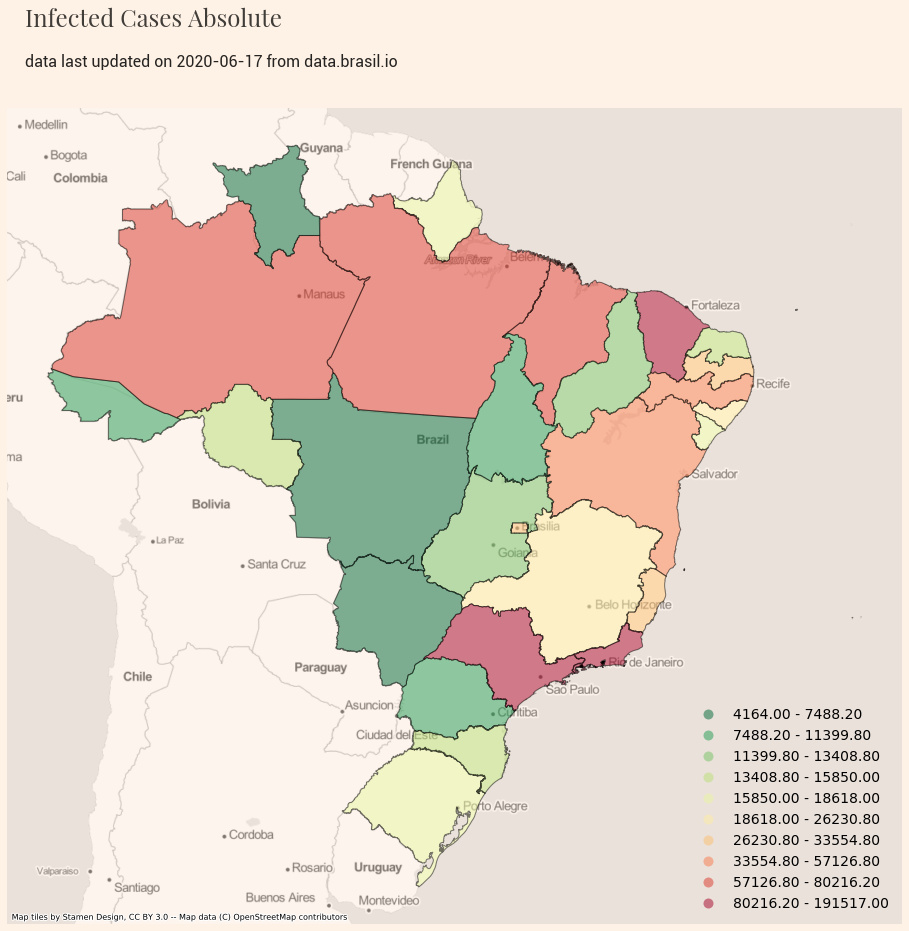

In [38]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='infected',ax=ax,alpha=0.5, legend=True,cmap='RdYlGn_r',\
                  scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected Cases Absolute",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [20]:
df=df.sort_values('state') 
df_select=df.groupby(['date','state'],as_index = False).sum().pivot('date','state')

df_confirmed = df_select.fillna(0)['confirmed']
df_deaths = df_select.fillna(0)['deaths']
df_pop = df_select.fillna(0)['popEst']

df_pop = df_pop.max().to_frame().T


In [21]:
dataSaude['popEst']=pd.Series(df_pop.values[0],index=dataSaude.index)
dataSaude['infectedPerMi']=pd.Series(infected/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deadPerMi']=pd.Series(dead/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deathRatio']=pd.Series(np.array(dead)/np.array(infected)*100,index=dataSaude.index)

In [22]:
dataSaude

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,states,infected,dead,date,popEst,infectedPerMi,deadPerMi,deathRatio
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0...",AC,10339.0,281.0,2020-06-17,881935.0,11723.086168,318.617585,2.717864
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1...",AL,24867.0,811.0,2020-06-17,3337357.0,7451.105770,243.006667,3.261350
26,AMAZONAS,NORTE,13,"POLYGON ((-7494705.886 225993.992, -7493674.00...",AM,59547.0,2579.0,2020-06-17,4144597.0,14367.379989,622.255915,4.331033
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585...",AP,18618.0,338.0,2020-06-17,845731.0,22014.091951,399.654264,1.815447
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43...",BA,40926.0,1222.0,2020-06-17,14873064.0,2751.685866,82.161954,2.985877
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7...",CE,85606.0,5307.0,2020-06-17,9132078.0,9374.208148,581.138269,6.199332
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355....",DF,27140.0,365.0,2020-06-17,3015268.0,9000.858298,121.050600,1.344878
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44...",ES,30508.0,1179.0,2020-06-17,4018650.0,7591.604146,293.382106,3.864560
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603....",GO,12776.0,255.0,2020-06-17,7018354.0,1820.369847,36.333306,1.995930
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489...",MA,64735.0,1570.0,2020-06-17,7075181.0,9149.589247,221.902450,2.425272


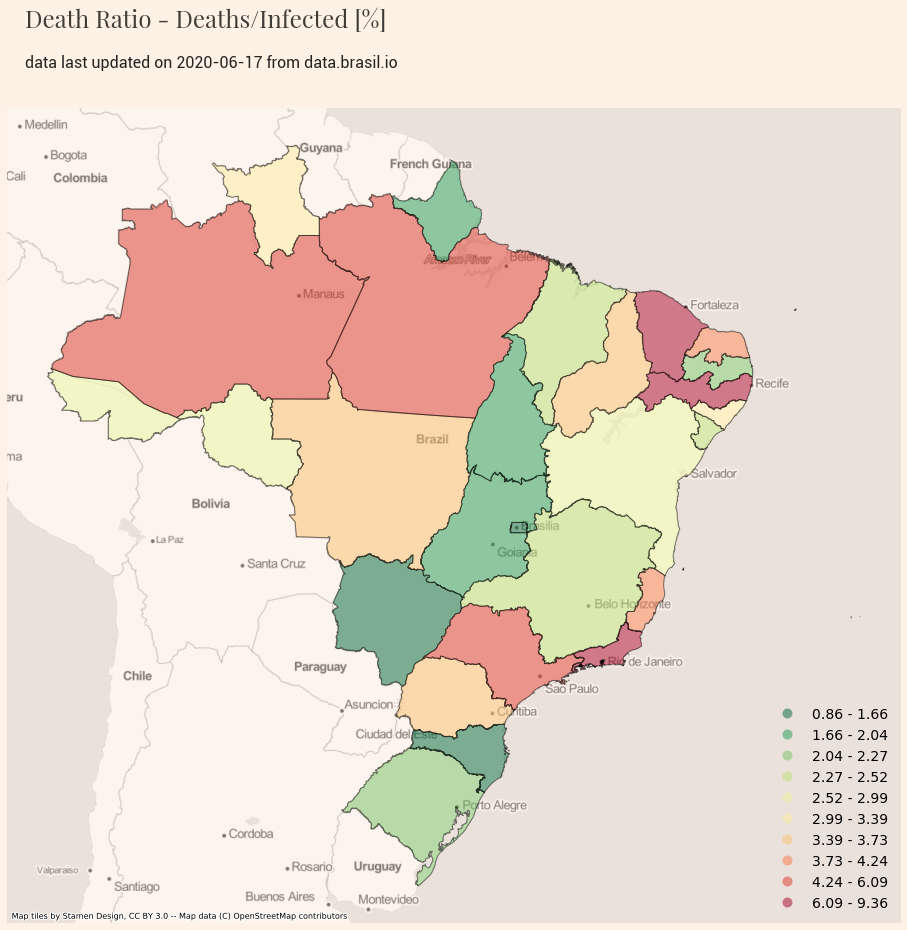

In [37]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='deathRatio',ax=ax,alpha=0.5,legend=True,cmap='RdYlGn_r',\
                  scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Death Ratio - Deaths/Infected [%]",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

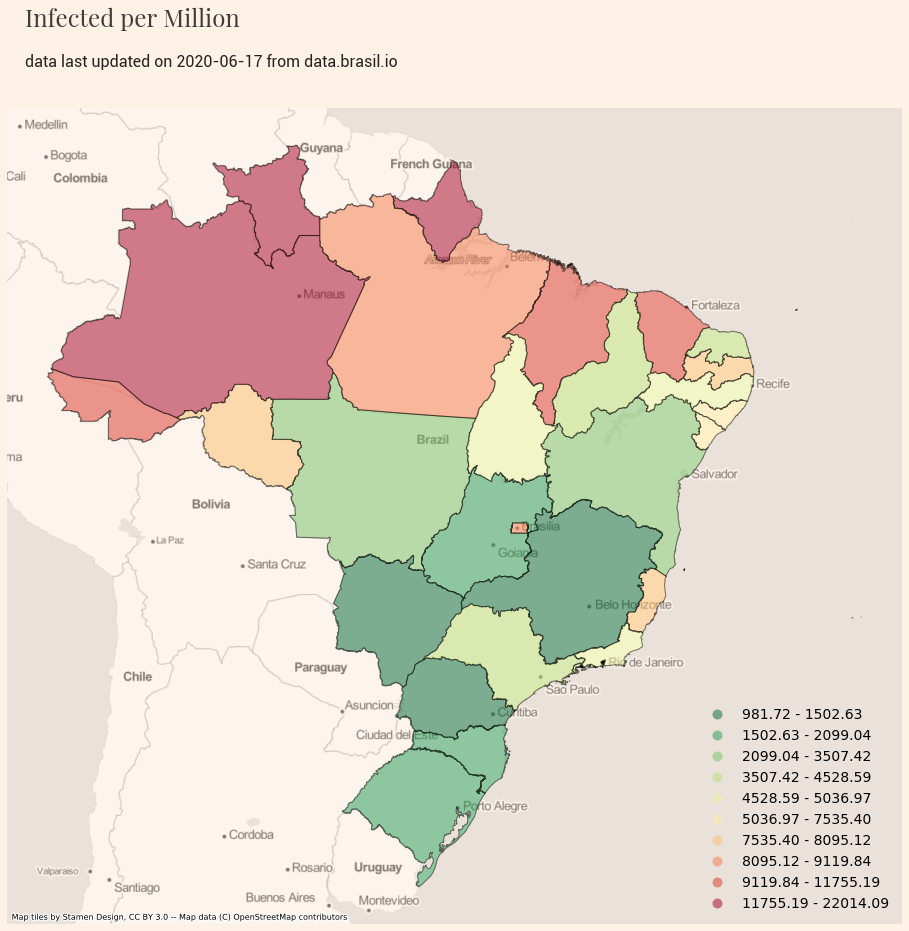

In [36]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='infectedPerMi',ax=ax,alpha=0.5,legend=True,cmap='RdYlGn_r',\
                  scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

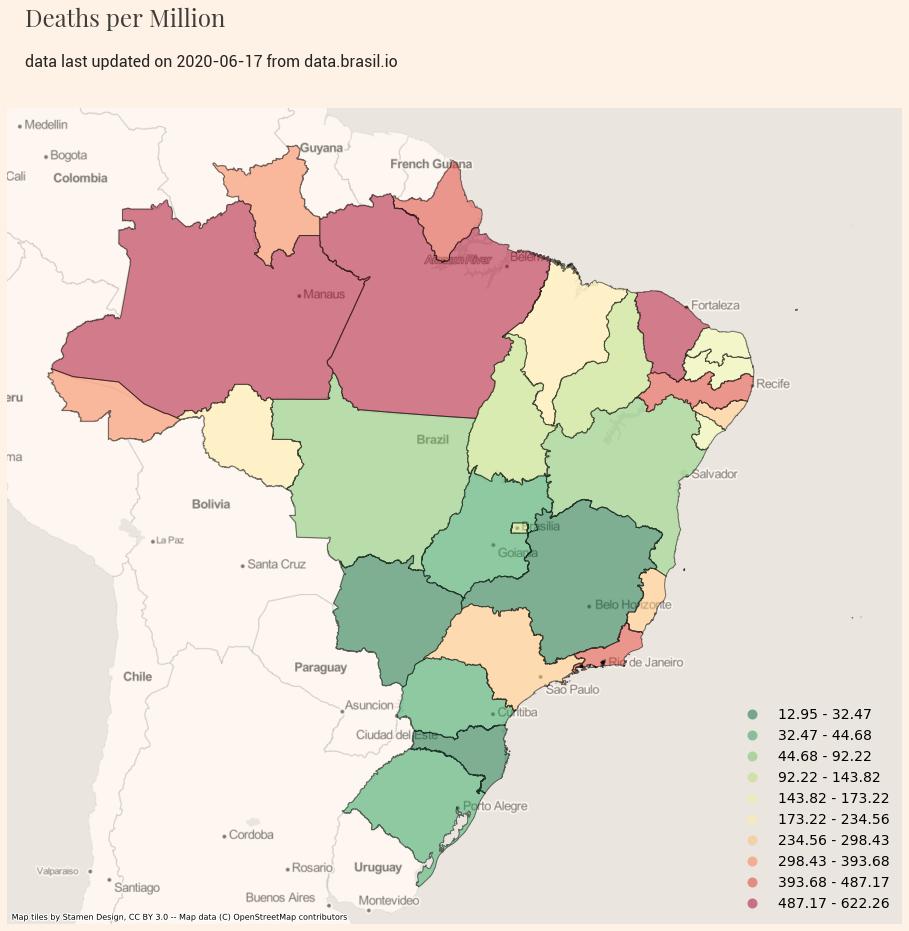

In [35]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='deadPerMi',ax=ax,alpha=0.5,legend=True,cmap='RdYlGn_r',\
                  scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)
ax.set_axis_off()
# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Deaths per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

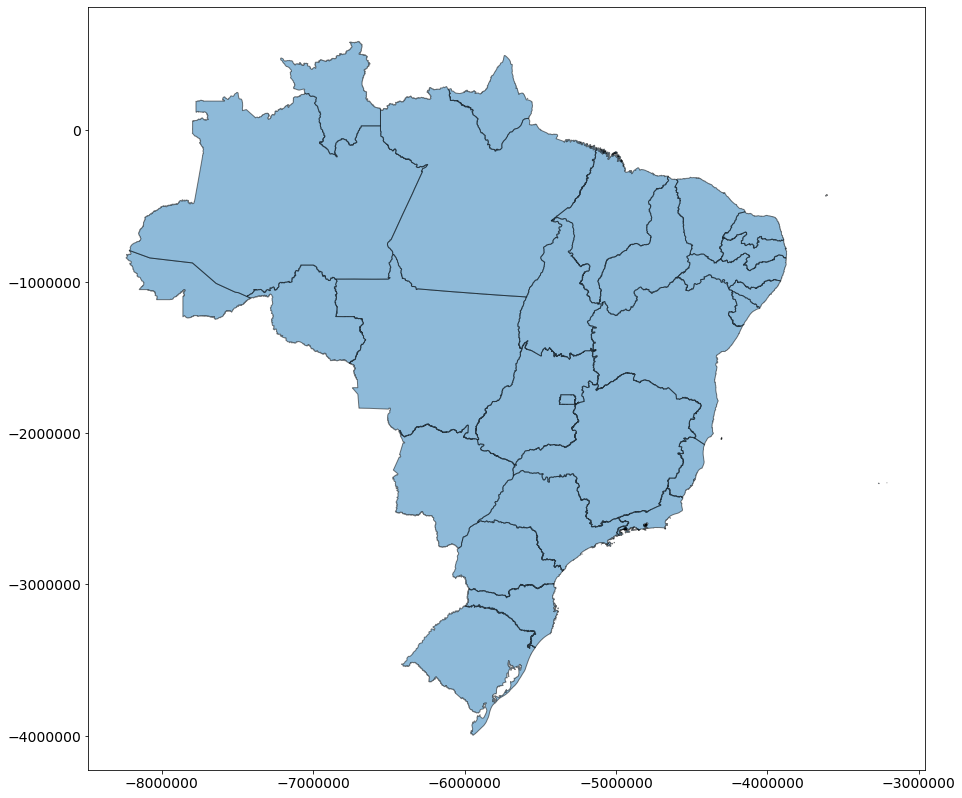

In [26]:
ax = dataSaude.plot(figsize=(15, 20), alpha=0.5, edgecolor='k')

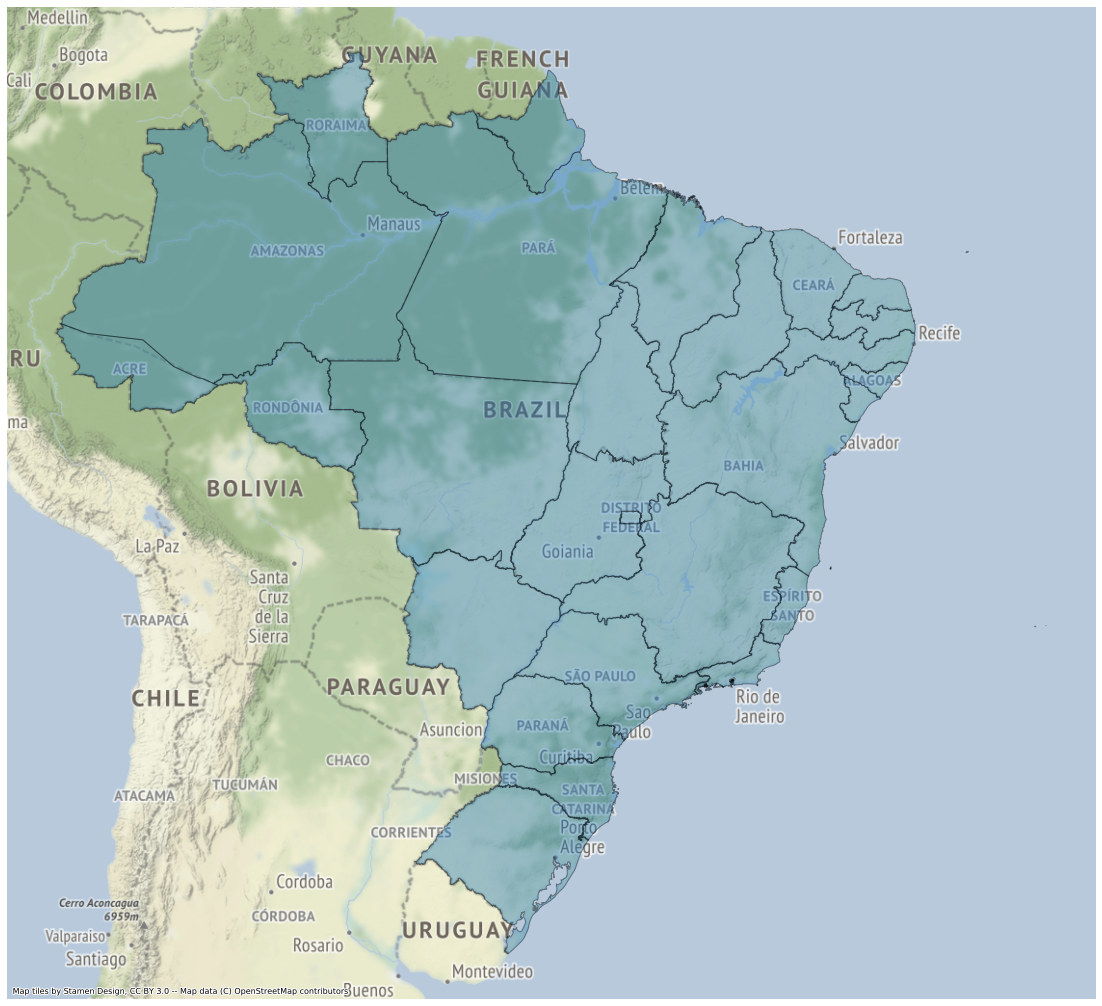

In [27]:
ax = dataSaude.plot(figsize=(15*1.3, 20*1.3), alpha=0.4, edgecolor='k',k=10)
ctx.add_basemap(ax,alpha=0.7)
ax.set_axis_off()

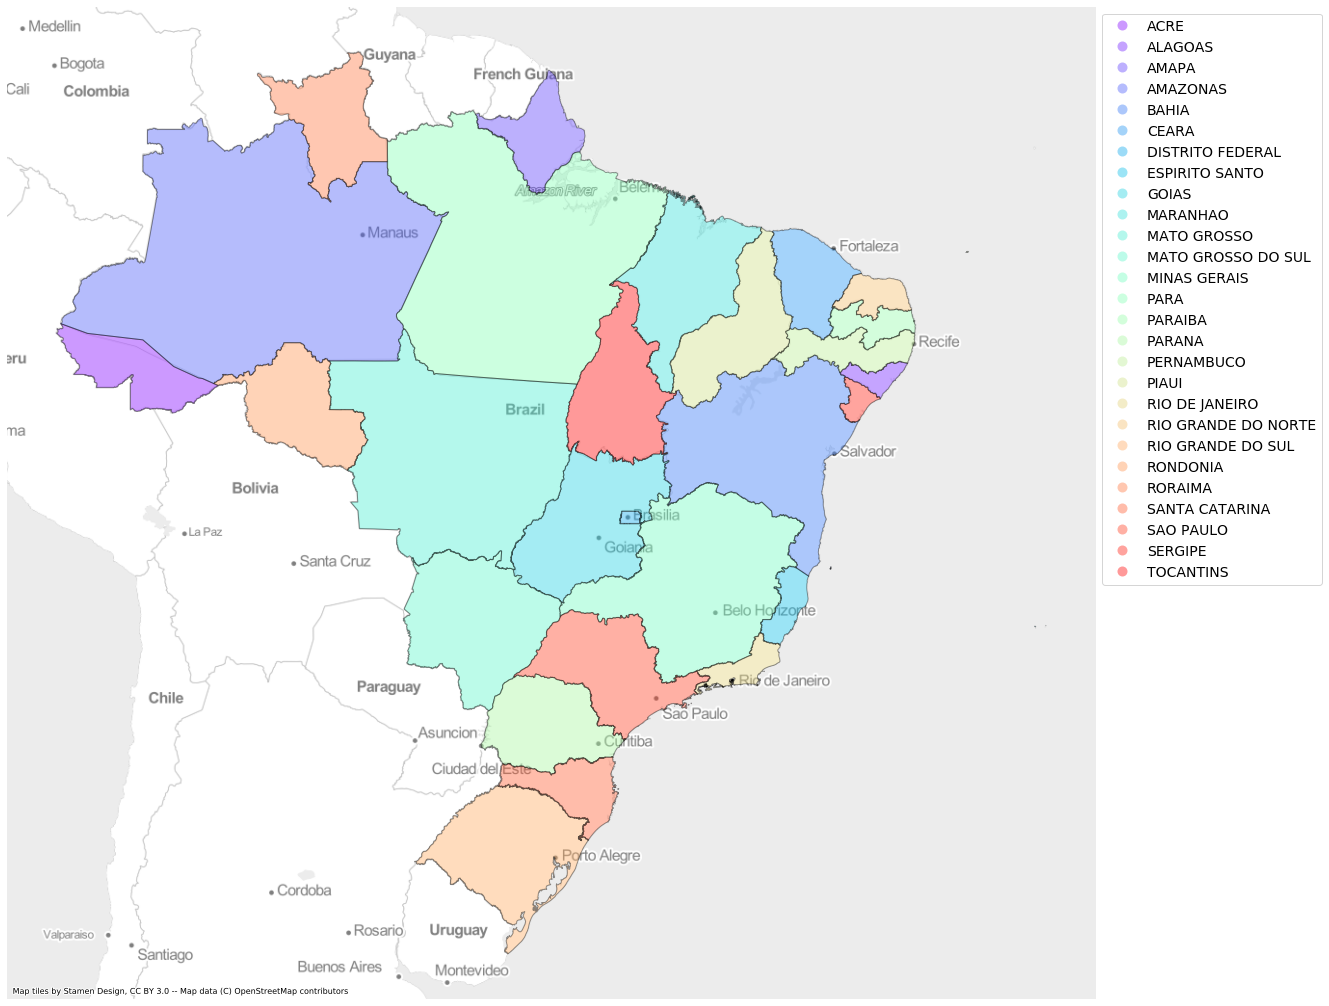

In [28]:
ax = dataSaude.plot(column="NM_ESTADO", figsize=(15*1.3, 20*1.3), alpha=0.4, \
                    edgecolor='k',k=10, legend=True,cmap='rainbow',\
                    legend_kwds=dict(loc='upper left', bbox_to_anchor=(1, 1)))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)
ax.set_axis_off()